<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" height=300 width=300 />


# Final Project: League of Legends Match Predictor 


### Introduction  

League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. Perform the following steps to build a logistic regression model aimed at predicting the outcomes of League of Legends matches.  

Use the [league_of_legends_data_large.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) file to perform the tasks.  

### Step 1: Data Loading and Preprocessing  

#### Task 1: Load the League of Legends dataset and preprocess it for training.  

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features. You will utilize `pandas` for data manipulation, `train_test_split` from `sklearn` for data splitting, and `StandardScaler` for feature scaling.  

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features.  

Please take responsibility for managing and installing all the required libraries for this lab on your own.

In [ ]:
%pip install pandas==2.2.2
%pip install numpy==1.26.4
%pip install matplotlib==3.8.0
%pip install scikit-learn==1.5.0
%pip install torch==2.3.1
%pip install ucimlrepo==0.0.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 125.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 104.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 37.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 96.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 108.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


#### Exercise 1:  

Write a code to load the dataset, split it into training and testing sets, standardize the features, and convert the data into PyTorch tensors for use in training a PyTorch model.  

In [4]:
## Write your code here
# Import necessary libraries
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv'
df = pd.read_csv(url)

# Separate features and target variable
X = df.drop('win', axis=1)  # target_column
y = df['win']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)  # Use dtype=torch.long if it's a classification task
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)    # Use dtype=torch.long if it's a classification task

# Display the tensor shapes for verification
print("Training data shape:", X_train_tensor.shape)
print("Training labels shape:", y_train_tensor.shape)
print("Testing data shape:", X_test_tensor.shape)
print("Testing labels shape:", y_test_tensor.shape)


# print the first few rows of the data
display(X.head())

# print the first few rows of the target
display(y.head())

Training data shape: torch.Size([800, 8])
Training labels shape: torch.Size([800])
Testing data shape: torch.Size([200, 8])
Testing labels shape: torch.Size([200])


,kills,deaths,assists,gold_earned,cs,wards_placed,wards_killed,damage_dealt
0,16,6,19,17088,231,11,7,15367
1,8,8,5,14865,259,10,2,38332
2,0,17,11,15919,169,14,5,24642
3,19,11,1,11534,264,14,3,15789
4,12,7,6,18926,124,15,7,40268


0    0
1    1
2    0
3    0
4    0
Name: win, dtype: int64

### Step 2: Logistic Regression Model  

#### Task 2: Implement a logistic regression model using PyTorch.  

Defining the logistic regression model involves specifying the input dimensions, the forward pass using the sigmoid activation function, and initializing the model, loss function, and optimizer.  

#### Exercise 2:  

Define the logistic regression model using PyTorch, specifying the input dimensions and the forward pass. Initialize the model, loss function, and optimizer.  


In [10]:
## Write your code here
import torch
import torch.nn as nn
import torch.optim as optim

# Define the logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # 1 output for binary classification

    def forward(self, x):
        # Forward pass with sigmoid activation
        return torch.sigmoid(self.linear(x))

# Initialize the model
input_dim = 8  # Number of features in the dataset (excluding the target 'win')
model = LogisticRegressionModel(input_dim)

# Initialize the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent optimizer

In [11]:
# Example forward pass with dummy data
dummy_input = torch.rand(1, input_dim)  # Batch size of 1, with 9 features
dummy_output = model(dummy_input)
print("Output:", dummy_output.item())

Output: 0.4830147624015808


### Step 3: Model Training  

#### Task 3: Train the logistic regression model on the dataset.  

The training loop will run for a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, performs backpropagation, and updates the model parameters .  

#### Exercise 3:  

Write the code to train the logistic regression model on the dataset. Implement the training loop, making predictions, calculating the loss, performing backpropagation, and updating model parameters. Evaluate the model's accuracy on training and testing sets.  


In [12]:
# Write your code here
# Number of epochs to train the model
num_epochs = 100
# Set a threshold for classification based on probability
threshold = 0.5

# Training loop
for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()

    # Forward pass: Compute predictions and loss
    outputs = model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor)

    # Backward pass: Compute gradients
    optimizer.zero_grad()
    loss.backward()

    # Update model parameters
    optimizer.step()

    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation on training and testing sets
def evaluate_accuracy(model, X, y, threshold=0.5):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient computation
        predictions = model(X).squeeze()  # Get predictions
        predicted_labels = (predictions >= threshold).float()  # Apply threshold for classification
        accuracy = (predicted_labels == y).float().mean()  # Calculate accuracy
    return accuracy.item()

# Calculate accuracy on training and testing sets
train_accuracy = evaluate_accuracy(model, X_train_tensor, y_train_tensor)
test_accuracy = evaluate_accuracy(model, X_test_tensor, y_test_tensor)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

Epoch [10/100], Loss: 0.7266
Epoch [20/100], Loss: 0.7249
Epoch [30/100], Loss: 0.7232
Epoch [40/100], Loss: 0.7216
Epoch [50/100], Loss: 0.7200
Epoch [60/100], Loss: 0.7185
Epoch [70/100], Loss: 0.7171
Epoch [80/100], Loss: 0.7157
Epoch [90/100], Loss: 0.7144
Epoch [100/100], Loss: 0.7131
Training Accuracy: 51.00%
Testing Accuracy: 54.50%


### Step 4: Model Optimization and Evaluation  

#### Task 4: Implement optimization techniques and evaluate the model's performance.  

Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets.  

#### Exercise 4:  

Implement optimization techniques like L2 regularization and retrain the model. Evaluate the performance of the optimized model on both training and testing sets.  


In [13]:
## Write your code here
# Set L2 regularization (lambda) parameter
lambda_l2 = 0.01

# Number of epochs for training
num_epochs = 100
threshold = 0.5

# Training loop with L2 regularization
for epoch in range(num_epochs):
    model.train()  # Set model to training mode

    # Forward pass: Compute predictions and base loss
    outputs = model(X_train_tensor).squeeze()
    base_loss = criterion(outputs, y_train_tensor)
    
    # L2 regularization term: sum of squared weights
    l2_penalty = 0
    for param in model.parameters():
        l2_penalty += torch.sum(param ** 2)
    
    # Total loss including L2 penalty
    loss = base_loss + lambda_l2 * l2_penalty

    # Backward pass and optimization
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()        # Compute gradients
    optimizer.step()       # Update weights

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation on training and testing sets
train_accuracy = evaluate_accuracy(model, X_train_tensor, y_train_tensor, threshold)
test_accuracy = evaluate_accuracy(model, X_test_tensor, y_test_tensor, threshold)

print(f'Training Accuracy with L2 Regularization: {train_accuracy * 100:.2f}%')
print(f'Testing Accuracy with L2 Regularization: {test_accuracy * 100:.2f}%')

Epoch [10/100], Loss: 0.7143
Epoch [20/100], Loss: 0.7130
Epoch [30/100], Loss: 0.7117
Epoch [40/100], Loss: 0.7105
Epoch [50/100], Loss: 0.7093
Epoch [60/100], Loss: 0.7082
Epoch [70/100], Loss: 0.7071
Epoch [80/100], Loss: 0.7061
Epoch [90/100], Loss: 0.7051
Epoch [100/100], Loss: 0.7042
Training Accuracy with L2 Regularization: 51.88%
Testing Accuracy with L2 Regularization: 54.00%


### Step 5: Visualization and Interpretation  

#### Task 5: Visualize the model's performance and interpret the results.  

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.  

#### Exercise 5:  

Write code to visualize the model's performance using confusion matrices and ROC curves. Generate classification reports to evaluate precision, recall, and F1-score. Retrain the model with L2 regularization and evaluate the performance.  


In [ ]:
%pip install seaborn
%pip install numpy

Confusion Matrix (Test Set):


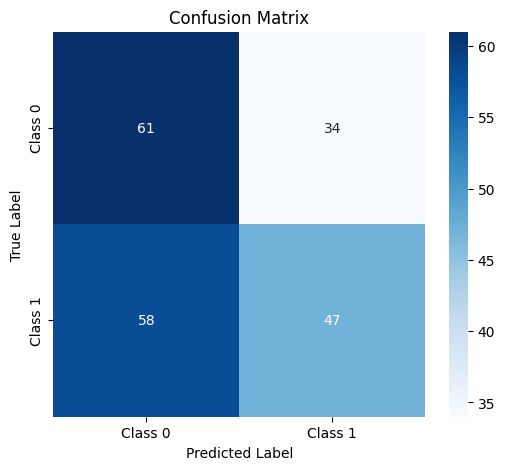

ROC Curve (Test Set):


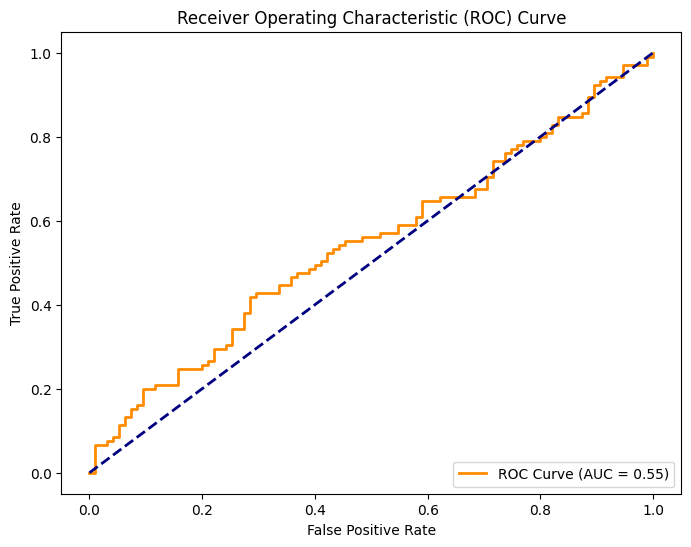

Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.51      0.64      0.57        95
         1.0       0.58      0.45      0.51       105

    accuracy                           0.54       200
   macro avg       0.55      0.54      0.54       200
weighted avg       0.55      0.54      0.54       200



In [17]:
## Write your code here
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import numpy as np

# Helper function to calculate and plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Helper function to plot the ROC curve
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

# Get model predictions and scores for evaluation
model.eval()
with torch.no_grad():
    train_outputs = model(X_train_tensor).squeeze()
    test_outputs = model(X_test_tensor).squeeze()

    # Apply threshold to get binary predictions
    train_pred_labels = (train_outputs >= threshold).int()
    test_pred_labels = (test_outputs >= threshold).int()

    # Get probabilities for ROC curve
    test_probabilities = test_outputs.numpy()

# Plot confusion matrix for the test set
print("Confusion Matrix (Test Set):")
plot_confusion_matrix(y_test_tensor.numpy(), test_pred_labels.numpy())

# Plot ROC curve for the test set
print("ROC Curve (Test Set):")
plot_roc_curve(y_test_tensor.numpy(), test_probabilities)

# Classification report for precision, recall, and F1-score
print("Classification Report (Test Set):")
print(classification_report(y_test_tensor.numpy(), test_pred_labels.numpy()))


### Step 6: Model Saving and Loading  

#### Task 6: Save and load the trained model.  

This task demonstrates the techniques to persist a trained model using `torch.save` and reload it using `torch.load`. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications.  

#### Exercise 6:  

Write code to save the trained model and reload it. Ensure the loaded model performs consistently by evaluating it on the test dataset.  


In [18]:
## Write your code here
import torch

# Define file path for saving the model
model_path = "logistic_regression_model.pth"

# Save the model
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

# Reload the model
loaded_model = LogisticRegressionModel(input_dim)
loaded_model.load_state_dict(torch.load(model_path))
loaded_model.eval()  # Set to evaluation mode
print("Model loaded successfully.")

# Evaluate the loaded model on the test set
with torch.no_grad():
    loaded_test_outputs = loaded_model(X_test_tensor).squeeze()
    loaded_test_pred_labels = (loaded_test_outputs >= threshold).int()

# Calculate accuracy of the loaded model
loaded_correct = (loaded_test_pred_labels == y_test_tensor).sum().item()
loaded_accuracy = loaded_correct / y_test_tensor.size(0)

print(f"Accuracy of the loaded model on the test set: {loaded_accuracy * 100:.2f}%")

# Optional: Check consistency with the original model’s performance
original_test_outputs = model(X_test_tensor).squeeze()
original_test_pred_labels = (original_test_outputs >= threshold).int()
original_correct = (original_test_pred_labels == y_test_tensor).sum().item()
original_accuracy = original_correct / y_test_tensor.size(0)

print(f"Consistency Check - Original Model Test Accuracy: {original_accuracy * 100:.2f}%")
print(f"Consistency Check - Loaded Model Test Accuracy: {loaded_accuracy * 100:.2f}%")

Model saved to logistic_regression_model.pth
Model loaded successfully.
Accuracy of the loaded model on the test set: 54.00%
Consistency Check - Original Model Test Accuracy: 54.00%
Consistency Check - Loaded Model Test Accuracy: 54.00%


### Step 7: Hyperparameter Tuning  

#### Task 7: Perform hyperparameter tuning to find the best learning rate.  

By testing different learning rates, you will identify the optimal rate that provides the best test accuracy. This fine-tuning is crucial for enhancing model performance .  

#### Exercise 7:  

Perform hyperparameter tuning to find the best learning rate. Retrain the model for each learning rate and evaluate its performance to identify the optimal rate.  


In [19]:
## Write your code here
import torch.optim as optim

# Define a list of learning rates to try
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.5]
num_epochs = 100  # Set a fixed number of epochs for each run

# Variable to store the best accuracy and the best learning rate
best_accuracy = 0.0
best_learning_rate = None

# Loop through each learning rate
for lr in learning_rates:
    print(f"\nTesting learning rate: {lr}")
    
    # Initialize a new model and optimizer for each learning rate
    model = LogisticRegressionModel(input_dim)
    optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=0.01)  # L2 regularization included
    
    # Training loop for the current learning rate
    for epoch in range(num_epochs):
        model.train()
        
        # Forward pass: Compute predictions and loss
        outputs = model(X_train_tensor).squeeze()
        loss = criterion(outputs, y_train_tensor)
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor).squeeze()
        test_pred_labels = (test_outputs >= threshold).int()
    
    # Calculate accuracy
    correct = (test_pred_labels == y_test_tensor).sum().item()
    accuracy = correct / y_test_tensor.size(0)
    
    print(f"Learning rate {lr} - Test Accuracy: {accuracy * 100:.2f}%")
    
    # Check if this is the best accuracy so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_learning_rate = lr

print(f"\nBest learning rate: {best_learning_rate} with test accuracy: {best_accuracy * 100:.2f}%")


Testing learning rate: 0.0001
Learning rate 0.0001 - Test Accuracy: 48.50%

Testing learning rate: 0.001
Learning rate 0.001 - Test Accuracy: 51.00%

Testing learning rate: 0.01
Learning rate 0.01 - Test Accuracy: 50.00%

Testing learning rate: 0.1
Learning rate 0.1 - Test Accuracy: 52.00%

Testing learning rate: 0.5
Learning rate 0.5 - Test Accuracy: 50.50%

Best learning rate: 0.1 with test accuracy: 52.00%


### Step 8: Feature Importance  

#### Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.  

The code to evaluate feature importance to understand the impact of each feature on the prediction.  

#### Exercise 8:  

Evaluate feature importance by extracting the weights of the linear layer and creating a DataFrame to display the importance of each feature. Visualize the feature importance using a bar plot.  


Feature Importance:
         Feature  Importance  Absolute Importance
3   gold_earned    0.168539             0.168539
0         kills    0.126118             0.126118
5  wards_placed    0.102143             0.102143
6  wards_killed   -0.032610             0.032610
7  damage_dealt   -0.017637             0.017637
2       assists   -0.012993             0.012993
4            cs   -0.007077             0.007077
1        deaths   -0.004459             0.004459


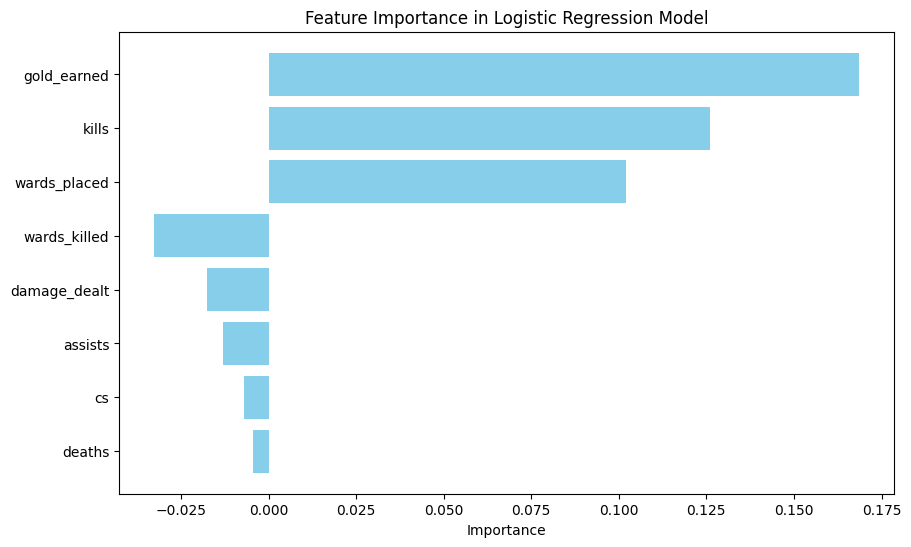

In [21]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Extract weights (coefficients) from the linear layer of the trained model
feature_weights = model.linear.weight[0].detach().numpy()

# Define feature names
feature_names = ["kills", "deaths", "assists", "gold_earned", "cs", "wards_placed", "wards_killed", "damage_dealt"]

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_weights
})

# Sort by absolute importance for clearer visualization
feature_importance_df['Absolute Importance'] = feature_importance_df['Importance'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Absolute Importance', ascending=False)

print("Feature Importance:\n", feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Logistic Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()

#### Conclusion:  

Congratulations on completing the project! In this final project, you built a logistic regression model to predict the outcomes of League of Legends matches based on various in-game statistics. This comprehensive project involved several key steps, including data loading and preprocessing, model implementation, training, optimization, evaluation, visualization, model saving and loading, hyperparameter tuning, and feature importance analysis. This project provided hands-on experience with the complete workflow of developing a machine learning model for binary classification tasks using PyTorch.

© Copyright IBM Corporation. All rights reserved.


# Sample Solution:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
# Load the dataset
data = pd.read_csv('league_of_legends_data_large.csv')
# Preprocess the data
X = data.drop('win', axis=1)
y = data['win']
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)
print("Data loading, splitting, and standardization complete.")

In [ ]:
import torch.nn as nn
import torch.optim as optim

# Define the logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = LogisticRegressionModel(input_dim)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

print("Model, loss function, and optimizer initialization complete.")

In [ ]:
# Training the model
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Model evaluation
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train).detach()
    y_pred_test = model(X_test).detach()
    
train_accuracy = ((y_pred_train > 0.5) == y_train).float().mean()
test_accuracy = ((y_pred_test > 0.5) == y_test).float().mean()

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

In [ ]:
# Implementing L2 regularization (Ridge Regression)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

# Retrain the model with L2 regularization
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the optimized model
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train).detach()
    y_pred_test = model(X_test).detach()
    
train_accuracy = ((y_pred_train > 0.5) == y_train).float().mean()
test_accuracy = ((y_pred_test > 0.5) == y_test).float().mean()

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

# Visualize the confusion matrix
y_pred_test_labels = (y_pred_test > 0.5).float()
cm = confusion_matrix(y_test, y_pred_test_labels)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test_labels, target_names=['Loss', 'Win']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Save the model
torch.save(model.state_dict(), 'logistic_regression_model.pth')

# Load the model
loaded_model = LogisticRegressionModel(input_dim)
loaded_model.load_state_dict(torch.load('logistic_regression_model.pth'))

# Ensure the loaded model is in evaluation mode
loaded_model.eval()

# Evaluate the loaded model
with torch.no_grad():
    y_pred_test_loaded = loaded_model(X_test).detach()
    loaded_test_accuracy = ((y_pred_test_loaded > 0.5) == y_test).float().mean()
    print(f'Loaded Model Test Accuracy: {loaded_test_accuracy:.4f}')


In [ ]:
learning_rates = [0.01, 0.05, 0.1]
best_accuracy = 0
best_lr = 0

for lr in learning_rates:
    # Reinitialize the model and optimizer for each learning rate
    model = LogisticRegressionModel(input_dim)
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    # Training the model
    epochs = 1000
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        
        if (epoch+1) % 100 == 0:
            print(f'Learning Rate: {lr}, Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    
    # Evaluate the model
    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test).detach()
        test_accuracy = ((y_pred_test > 0.5) == y_test).float().mean()
        print(f'Learning Rate: {lr}, Test Accuracy: {test_accuracy:.4f}')
        
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_lr = lr

print(f'Best Learning Rate: {best_lr}, Best Test Accuracy: {best_accuracy:.4f}')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the weights of the linear layer
weights = model.linear.weight.data.numpy().flatten()
features = X.columns

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()